# House Price Prediction using advanced regression

## Problem statement

A US-based housing company has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. The company has collected a data set from the sale of houses in Australia. The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.


## The solution is divided into the following sections: 
- Data understanding
- Data cleaning (Clean the data i.e. replace the null or derived the column values if they are null)
- Data Visualization (Plot the graph between variables to understand relation)
- Data preparation (As part of this create dummy variables for required columns)
- Model building and evaluation
- Observations

## 1. Data understanding
- Data exploration (analyse both categorical and analytical columns)
- Data cleaning & imputing
- Data visualisation (i.e. Sales price vs categorical and numerical variables.)

In [1]:
#import the libraries required for further analysis
#Load the libraries which will be required further for analysis

import numpy as np
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [3]:
#load the data
data_location = "train.csv"
house_pricing = pd.read_csv(data_location)
house_pricing.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#size of dataset
house_pricing.shape 

(1460, 81)

### Print data set column informations:

- Data type of column (i.e. int/flat/object)
- Number of records containing non-null information.

<font color="red">Observations:</font>
- For some of the columns most of the values are null for ex: Alley, FireplaceQu, Fence, MiscFeature, PoolQC

In [5]:
#check the columns and nullable values i.e. number of records null
house_pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# function to print column with missing values
def print_column_with_missing_values(data_frame):
    column_with_null_values = round(100* (data_frame.isnull().sum().sort_values(ascending = False)/len(data_frame.index)), 2)
    column_with_null_values = column_with_null_values[column_with_null_values>0]
    print(column_with_null_values)

In [7]:
# print the percentage of recrods containing null values for the column
print_column_with_missing_values(house_pricing)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageCond       5.55
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64


### Numerical column analysis i.e. percentile of the data distributed, it can help use in treating outliers
Check the summary of the numerical data i.e. percentile. For outlier we can check 75% of the data set and compared with 90%, 95%, 99%
- For additional information, print 90, 95 & 99 percentil of the data to check outliers.


In [8]:
house_pricing.describe(percentiles=[.25,.50,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,96.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,1387.050000,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,1

### 1.2 Data Cleaning and imputing.
As part of data cleaning, a number of checks will be performed

- Drop duplicates
- Data Imputing (i.e. update the missing values for categorical and numerical columns)

### 1.2.1 Drop duplicates
<font color="red">Observations:</font> No duplicate records were found

In [9]:
print("Shape before dropping duplicates : ", house_pricing.shape)
house_pricing.drop_duplicates()
print("Shape after dropping duplicates : ", house_pricing.shape)

Shape before dropping duplicates :  (1460, 81)
Shape after dropping duplicates :  (1460, 81)


### 1.2.2 Data Imputing
- Check for columns with missing values and replace with appropriate values

- A number of categorical columns where feature was not available were marked "none"

- Numerical columns were replaced with median values. (LotFrontage, GarageYrBlt, MasVnrArea, Electrical)

In [10]:
# function to print column with missing values
def print_column_with_missing_values(data_frame):
    column_with_null_values = round(100* (data_frame.isnull().sum().sort_values(ascending = False)/len(data_frame.index)), 2)
    column_with_null_values = column_with_null_values[column_with_null_values>0]
    print(column_with_null_values)
    return column_with_null_values

In [11]:
print_column_with_missing_values(house_pricing)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageCond       5.55
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64


PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageCond       5.55
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

#### Columns with high record of null values may not be of much significance, and these parameters can be safely removed.

In [12]:
# Drop the id column as well since its not important
columns_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'Id']
house_pricing = house_pricing.drop(columns = columns_to_drop, axis = 1)
print('Columns after dropping the variables', house_pricing.columns)

Columns after dropping the variables Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCon

### 1.2.2.1 Categorical columns (handling missing values of the data)
- Replace missing column values as null

In [13]:
columns_with_missing_features = ["FireplaceQu", "GarageCond" , "GarageType", "GarageFinish", "GarageQual", 
                                 "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "BsmtCond", "BsmtQual", "MasVnrType"]
for column_name in columns_with_missing_features:
    house_pricing[column_name].fillna("none", inplace=True)

print_column_with_missing_values(house_pricing)

LotFrontage    17.74
GarageYrBlt     5.55
MasVnrArea      0.55
Electrical      0.07
dtype: float64


LotFrontage    17.74
GarageYrBlt     5.55
MasVnrArea      0.55
Electrical      0.07
dtype: float64

### 1.2.2.2 Numeric columns (replace the numerical columns with their median values)

In [14]:
house_pricing["LotFrontage"].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [15]:
house_pricing["GarageYrBlt"].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [16]:
house_pricing["MasVnrArea"].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [17]:
house_pricing["Electrical"].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [18]:
### As per data dictionary LotFrontage: Linear feet of street connected to property
house_pricing['LotFrontage'] = house_pricing.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
house_pricing["GarageYrBlt"].fillna(house_pricing["GarageYrBlt"].median(), inplace=True)
house_pricing["MasVnrArea"].fillna(house_pricing["MasVnrArea"].median(), inplace=True)
house_pricing["Electrical"].dropna(inplace=True)

In [19]:
#Check again for columns with null or missing values
print_column_with_missing_values(house_pricing)

Electrical    0.07
dtype: float64


Electrical    0.07
dtype: float64

In [20]:
house_pricing.shape

(1460, 76)

### 1.3 Data visualisation (i.e. Sales price vs categorical and numerical variables.)

As part of data visualisation, we analyze categorica
- Univariate analysis (categorical columns)
- Bi-variate analysis

Drop the final variables which may not have much impact on final model

### 1.3.1 Univariate analysis (categorical column)

### We can notice some of the variables have no variance across data set such as:
 - Utilities
 - Condition 2
 - RoofMatl
 - Heating 
 - CentralAir
 
#### We should plot the graph (countPlot) and check the data-distribution against sale price

In [21]:
# Select the feature columns mark with object and analyze the box plot
house_pricing_categorical = house_pricing.select_dtypes(include=['object'])
print('Number of numeric columns: ', house_pricing_categorical.size)
print(house_pricing_categorical.columns)
print(len(house_pricing_categorical.columns))

Number of numeric columns:  56940
Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
39


#### Box plot analysis against sales price to check their diverse relationship

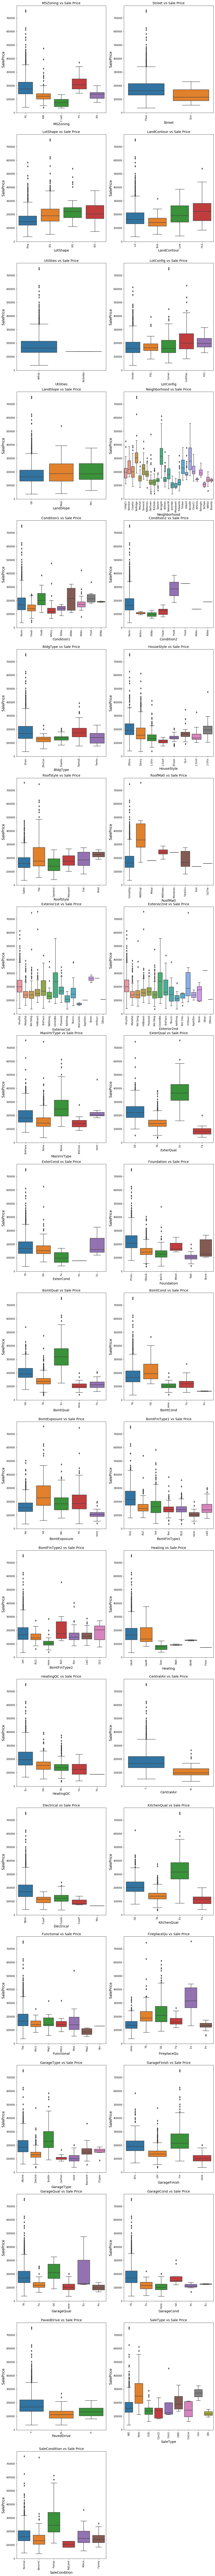

In [22]:
# Boxplot for categorical variables to see how they are related to sales price.
vars_cat = house_pricing_categorical.columns
plt.figure(figsize=(15, 200))
for i in enumerate(vars_cat):
    plt.subplot(20,2,i[0]+1)
    ax = sns.boxplot(data = house_pricing, x=i[1], y='SalePrice')
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
    ax.set_title(i[1] + " vs Sale Price", fontsize=14)
    ax.set_xlabel(i[1], fontsize=14)
    ax.set_ylabel("SalePrice", fontsize=15)
plt.show()

### Use count plot to see the variable distribution across data set.

#### Columns with low variance can be safely removed as they will not have an impact

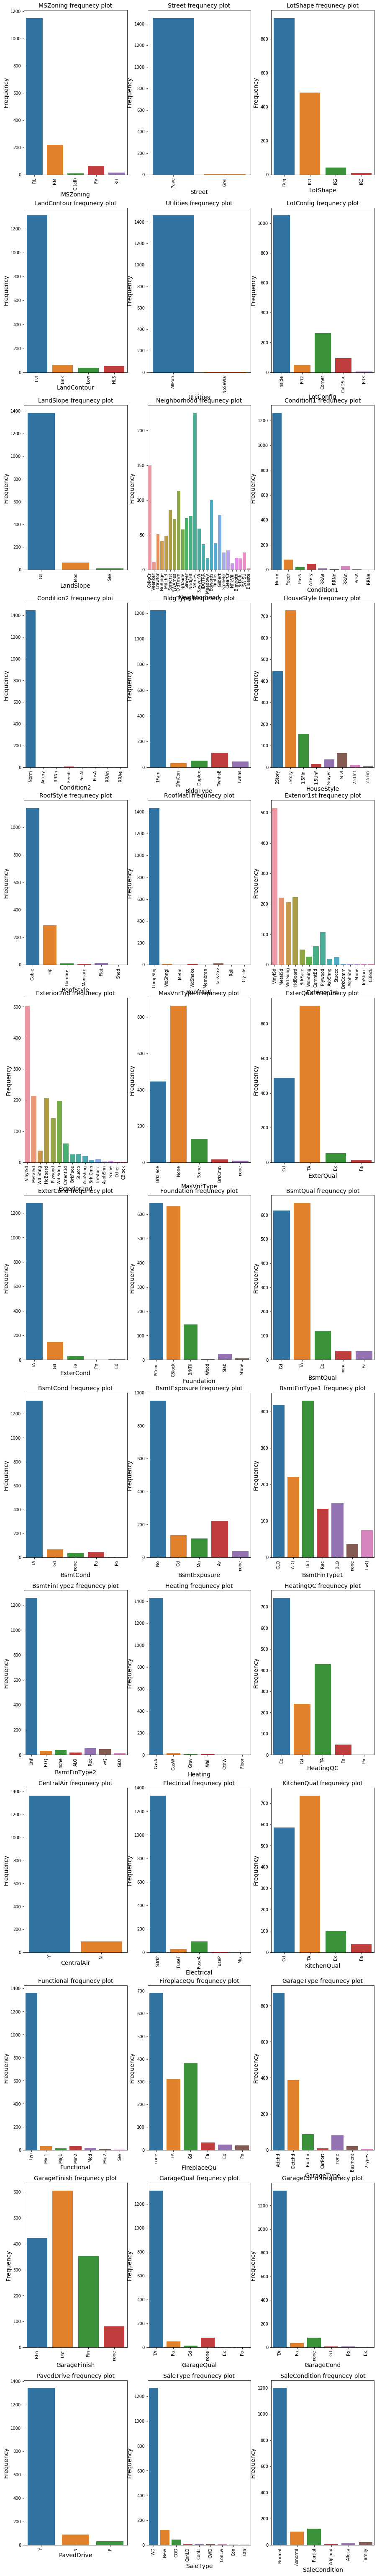

In [23]:
vars_cat = house_pricing_categorical.columns
plt.figure(figsize=(15, 120))
for i in enumerate(vars_cat):
    plt.subplot(14, 3, i[0] + 1)
    #ax = sns.boxplot(data = house_pricing, x=i[1], y='SalePrice')
    ax= sns.countplot(x=i[1] , data = house_pricing)
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
    ax.set_title(i[1] + " frequnecy plot", fontsize=14)
    ax.set_xlabel(i[1], fontsize=14)
    ax.set_ylabel("Frequency", fontsize=14)
plt.show()

### Categorical column analysis outcome

- Almost all the variables have impact on Sales Price. 
- Few columns where data distribution is very less, can be verified with value_counts() and safely be removed, as they will not have any impact on final model

In [24]:
# value_counts function can be used to check their variance in data size
columns_with_low_variance = ['Street', 'Utilities', 'MiscVal', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Functional']
house_pricing = house_pricing.drop(columns = columns_with_low_variance)

# Shape after dropping columns
house_pricing.shape

(1460, 68)

## Bi-variate analysis

### 1.3.1.2 Graph (Sale price vs OverallCond)
<font color="red">Observations:</font> Sales price increases as overall condition of the house increases

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

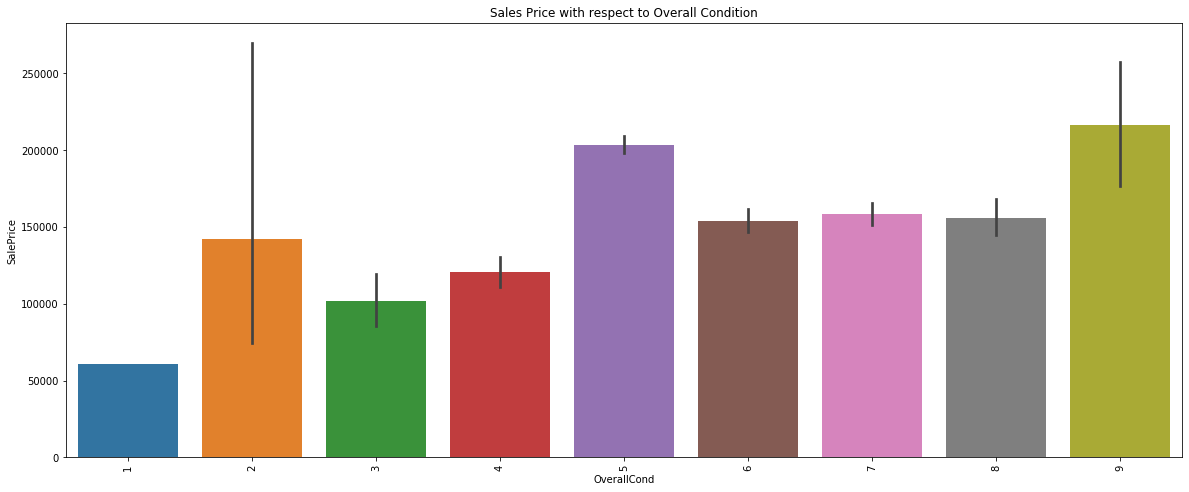

In [25]:
plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data = house_pricing)
plt.title("Sales Price with respect to Overall Condition")
plt.xticks(rotation=90)

### 1.3.1.3 Graph (Sale price vs Neighborhood)
<font color="red">Observations:</font> Sales price increases as overall quality of the house increases

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

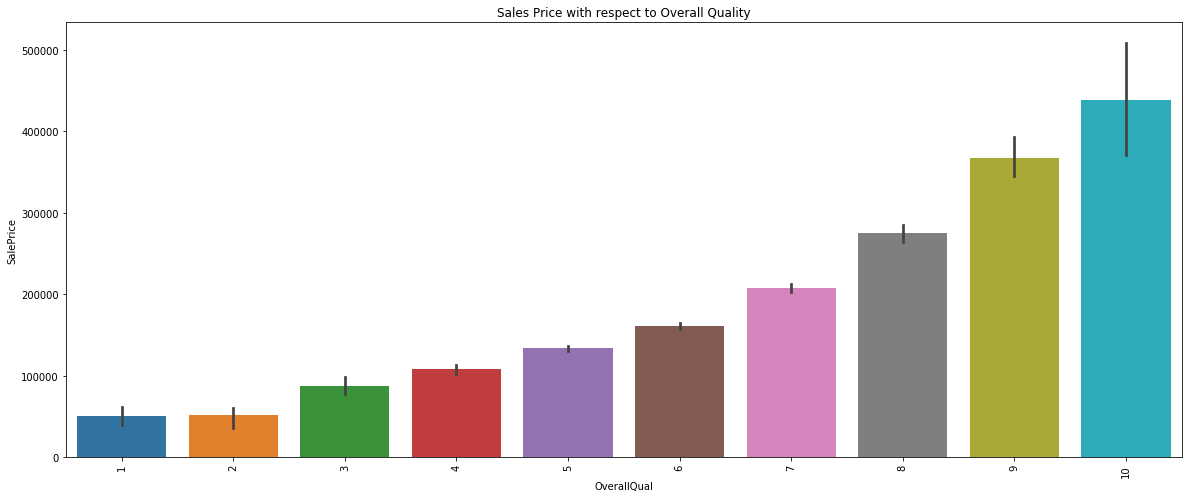

In [26]:
plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data = house_pricing)
plt.title("Sales Price with respect to Overall Quality")
plt.xticks(rotation=90)

### 1.3.2  Numerical variable analysis (Check the IQR, mean and percentile)


<font color="red">Observations:</font>
- For most of the columns data remains in range (for ex: SaleCondition..., SaleType..., GarageFinish..., Neighborhood...)
- For columns where data is fairly distributed we can do box plot analysis and check the data distribution range.

In [27]:
house_pricing.describe(percentiles=[.25,.50,.75,.90,.95,.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.199658,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.589041,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,6.321918,2007.815753,180921.195890
std,42.300571,22.431902,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.997022,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,70.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,160.000000,104.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,11.000000,2010.000000,326100.000000
99%,190.000000,137.410000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.280000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,360.000000,3123.480000,2.000000,1.000000

### Outlier handling:

#### From co-rrelation matrix, it can be noticed some of the variables IQR (range) is small compared to 99% of the data. 

- <font color="red">Given data-set size is very small, dropping a significant amount of data may not be of much help</font>
- Corelation matrix can be used to find significance or relationship between variables to drop the variable later.

In [28]:
columns = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'LowQualFinSF']

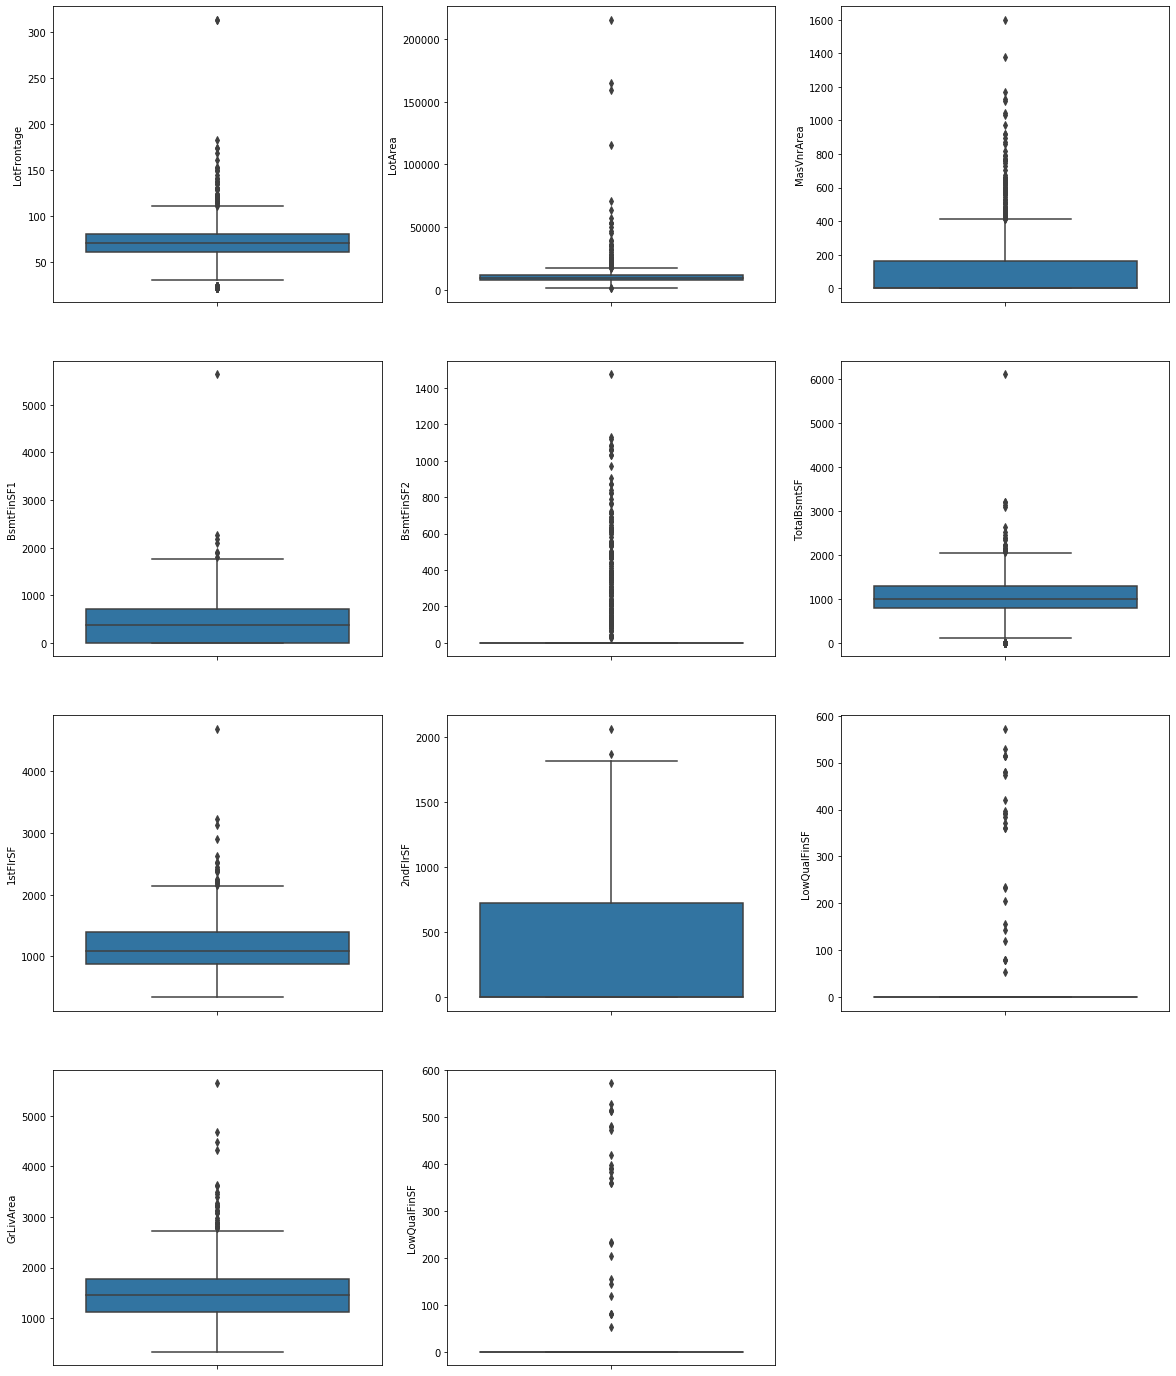

In [29]:
## Draw the box plot to figure out the outliers
plt.figure(figsize=(20, 25))
index = 1
for col in columns:
    plt.subplot(4,3,index)
    sns.boxplot(y = col, data = house_pricing)
    index +=1
plt.show()

### 1.3.3 Numerical columns analysis
- Analyse the numerical columns and check the distribution of the data i.e. percentile of the data is distributed

<font color="red">Observations:</font>
- For some of the columns (PoolArea, ScreenPorch, EnclosedPorch, MiscVal, OpenPorchSF) range/spread i.e. difference between 25% & 75% is zero.
- For some of the columns (For ex: MSSubClass, LotFrontage, LotArea) there is a huge difference between 90% of the data and 99%/max.
- For most of the columns data is in range i.e. 90% of the data and 99% are close.
    

In [30]:
# Select the numeric columns
house_pricing_numeric = house_pricing.select_dtypes(include=['float64', 'int64'])
print('Number of numeric columns: ', house_pricing_numeric.columns.size)
print(house_pricing_numeric.columns)

Number of numeric columns:  36
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MoSold',
       'YrSold', 'SalePrice'],
      dtype='object')


### Correlation matrix and pairplot analysis

### Observations: Variables high correlated with each other may be dropped as it may cause multi-colinearity
- Garage area vs Garage cars
- GarageYrBuilt vs YearBuilt
- TotRmsAbvGrd vs GrivArea/2ndFloorSF/BedroomAbvGr

In [31]:
# correlation matrix
corr = house_pricing_numeric.corr()
corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.370367,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.081396,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.013585,-0.021407,-0.084284
LotFrontage,-0.370367,1.000000,0.335957,0.239546,-0.043595,0.120999,0.084550,0.195830,0.232576,0.052237,0.119174,0.381038,0.434109,0.075686,0.031873,0.385190,0.107226,0.006620,0.186561,0.054190,0.245232,-0.005627,0.332619,0.249295,0.062380,0.281393,0.339085,0.088736,0.141734,0.008057,0.064654,0.041063,0.174567,0.007370,0.004756,0.349876
LotArea,-0.139781,0.335957,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.025865,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.239546,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.514231,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.043595,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.306276,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.120999,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.777182,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.084550,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.616444,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,0.021490,0.035743,0.507101
MasVnrArea,0.023573,0.195830,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.244444,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.069836,0.232576,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.148782,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.052237,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.087684,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,-0.015211,0.031706,-0.011378


### Only few variables have significant correlation coefficient against sail price. 

#### <font color="red">Lasso regression is prefered over ridge </font>

- If only few variable affect the response variable
- Not all variable have same level of significance


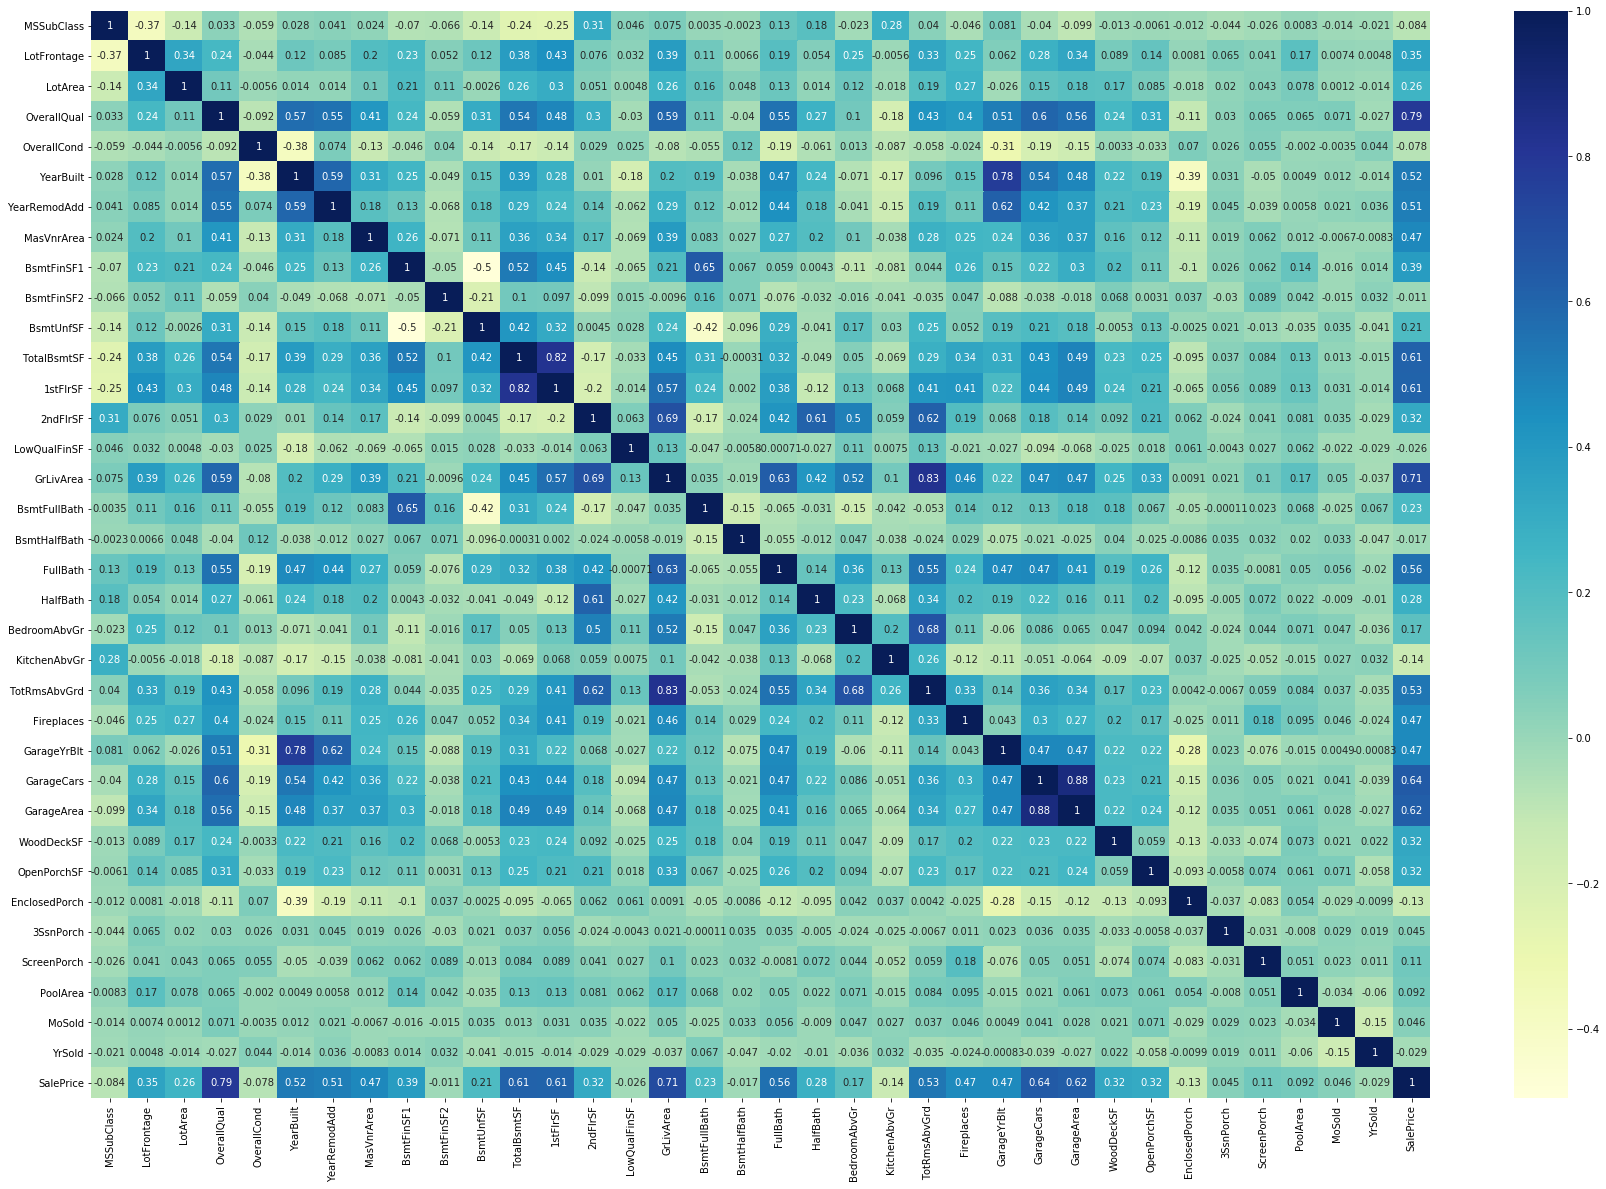

In [32]:
# plot the heatmap to observe the matrix
plt.figure(figsize=(30,20))
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

#### Pairplot analysis for some of the important variables. Variables which has significant correlation matrix co-efficient

#### In addition, we notice that none of the variables exhibit a sign of ploynomial function for ex. (X**2, x***3, log(feature-x)). We can safely assume that most of the variable have linear kind of relation

<Figure size 2160x2160 with 0 Axes>

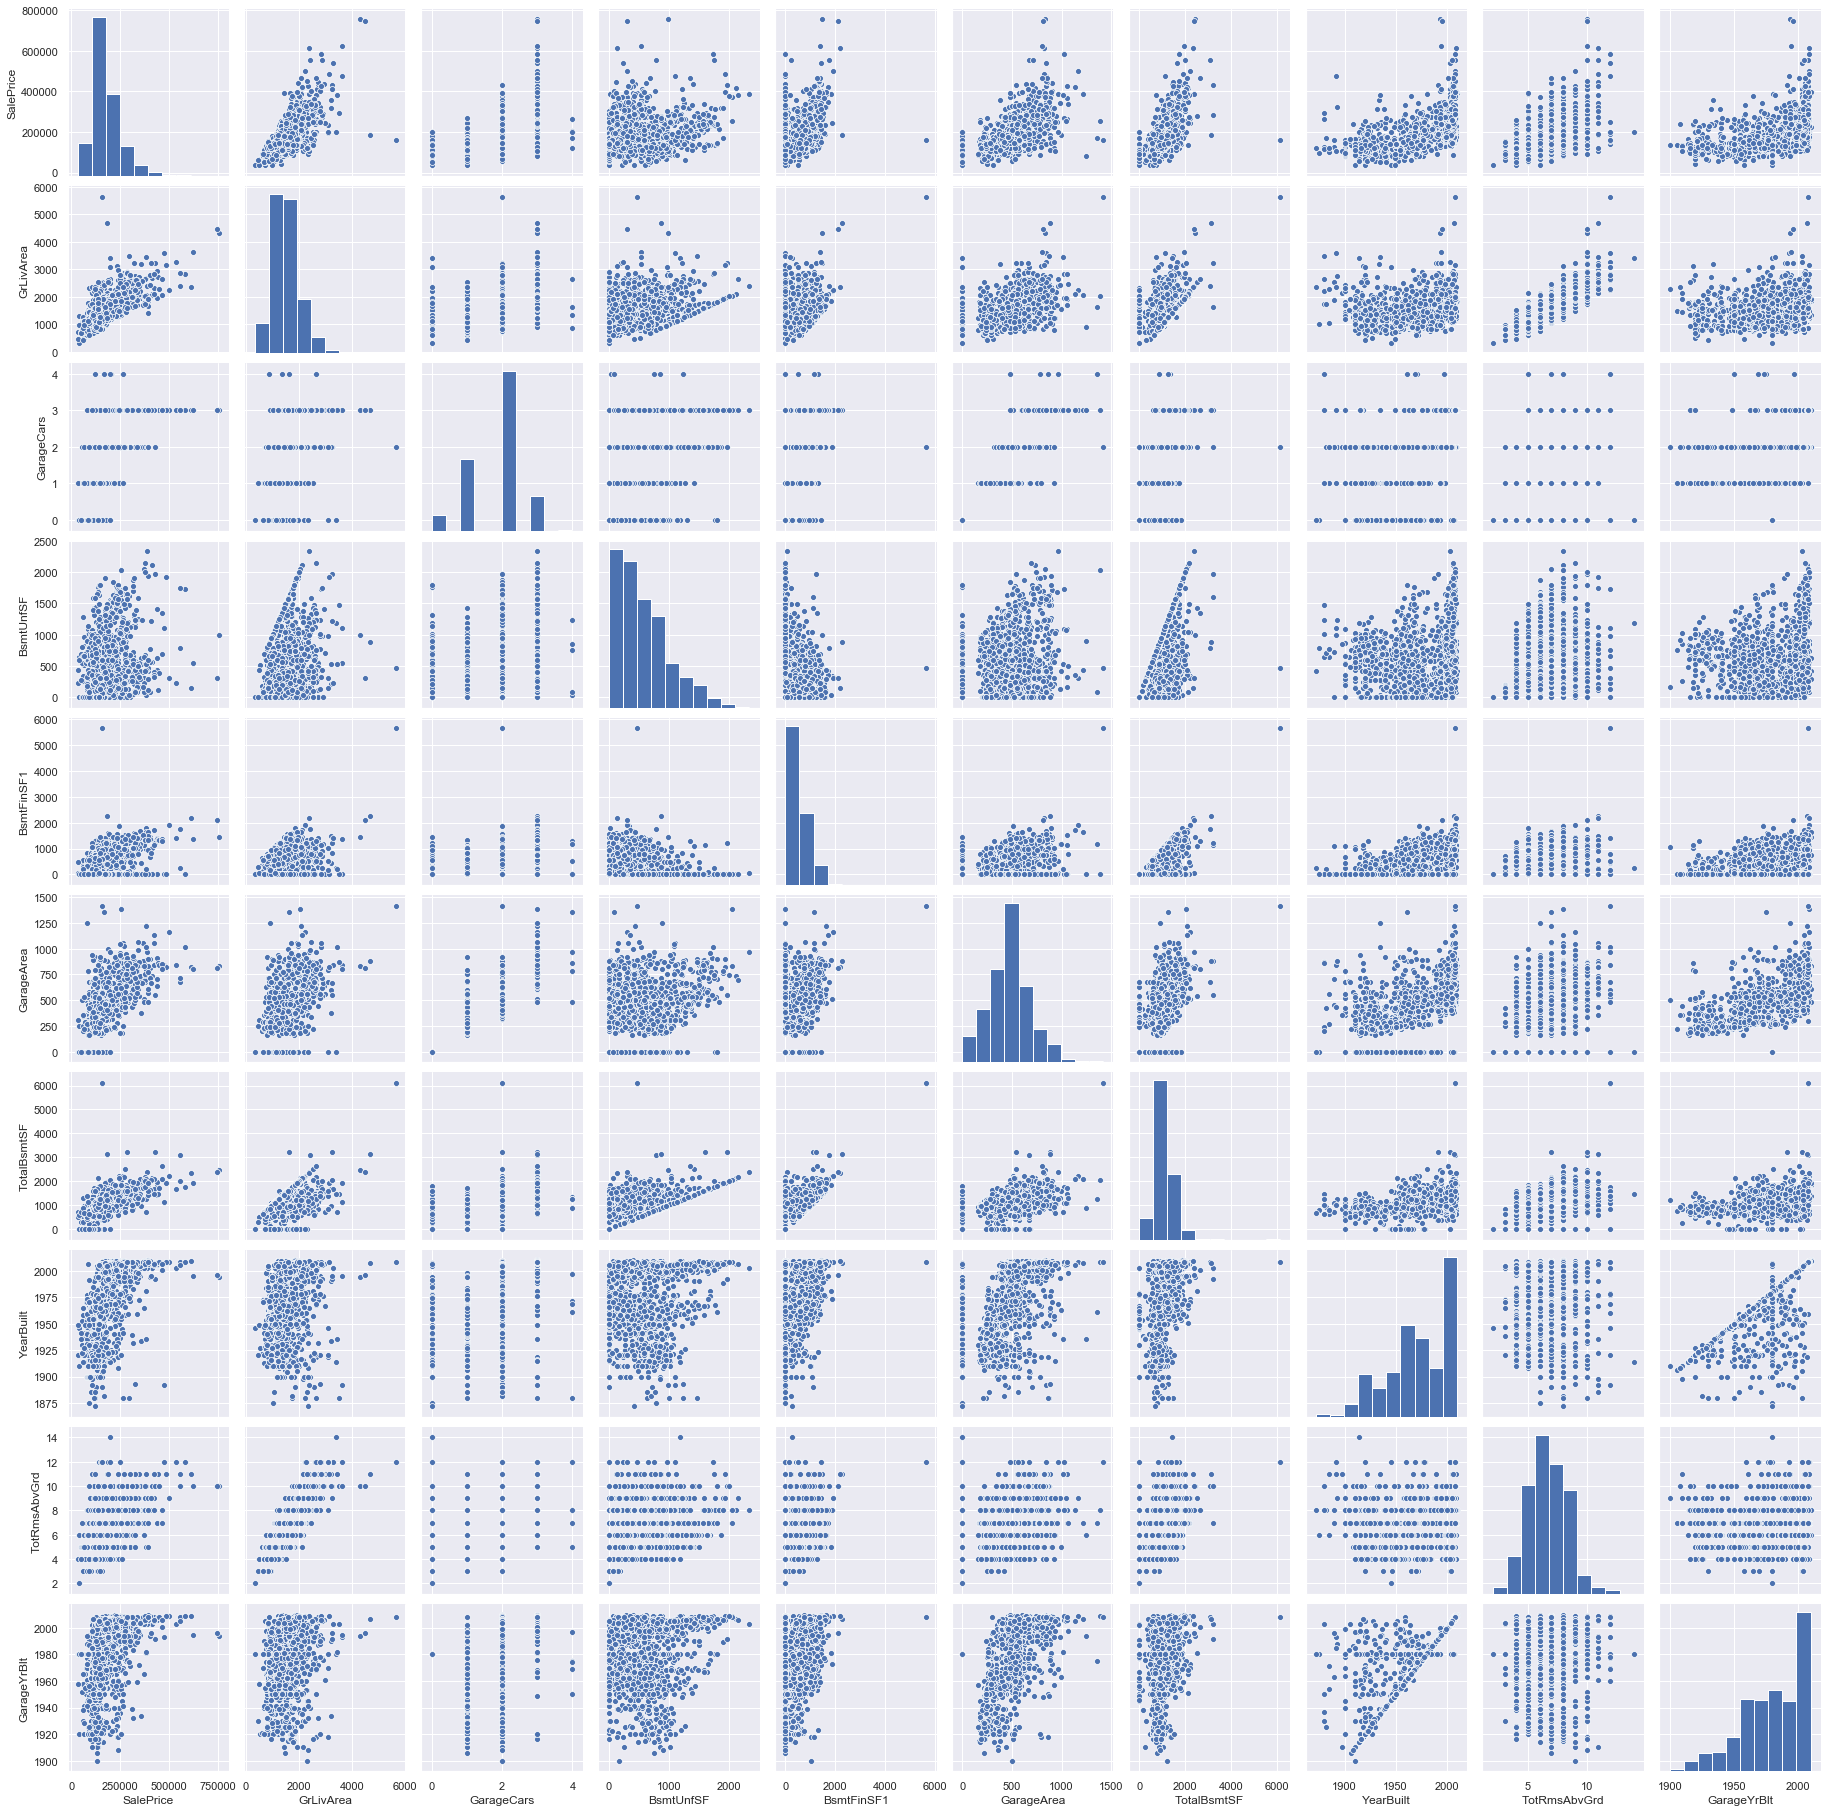

In [33]:
# Pairplot analysis for some of the important variables
plt.figure(figsize=(30,30))
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(house_pricing[cols], size = 2.5)
plt.show()

#### Drop the columns that are highly co-related and have no effect on sales price.

In [34]:
house_pricing = house_pricing.drop(columns=['GarageCars', 'BsmtUnfSF', 'TotRmsAbvGrd', 'GarageYrBlt'], axis = 1)
print('Columns after dropping the variables', house_pricing.columns)

Columns after dropping the variables Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageArea', 'GarageQual', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MoSold', 'YrSold', 'SaleType',
       'Sa

In [35]:
### common function to remove outliers, as data-size is small we may not use it.
def handle_outliers(x,y):
    q1 = x[y].quantile(0.25)
    q3 = x[y].quantile(0.75)
    value = q3-q1
    lower_value  = q1-1.5*value
    higer_value = q3+1.5*value
    out= x[(x[y]<higer_value) & (x[y]>lower_value)]
    return out

#### 1. Sales Price vs GrLivArea
<font color="red">Observations</font> One or two values seems to contain outliers, We can safely remove the data as it will not have any impact

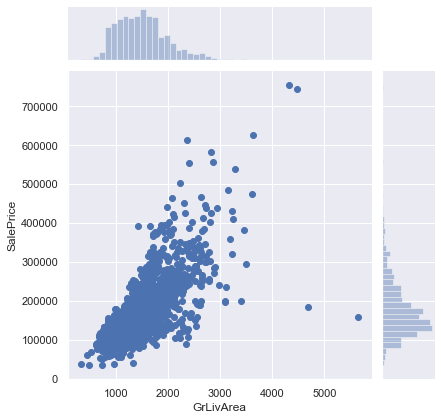

In [36]:
sns.jointplot(x='GrLivArea', y='SalePrice', data=house_pricing)
plt.show()

In [37]:
# Removing some outliers on lower right side of 'GrLivArea', only 1 record was removed
house_pricing = handle_outliers(house_pricing,'GrLivArea')
print('saphe of the dataset after removing outliers',house_pricing.shape)

saphe of the dataset after removing outliers (1429, 64)


#### Sales Price vs GrLivArea (after removing the outlier)
<font color="red">Observations</font> SalePrice increases with increase in GrLivArea and seems fairly distributed

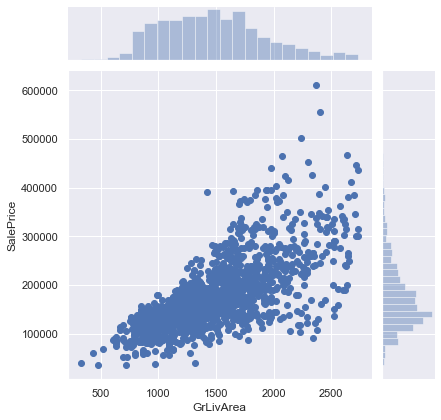

In [38]:
# Again plotting GeLivArea vs SalePrice
sns.jointplot(x = house_pricing['GrLivArea'], y = house_pricing['SalePrice'])
plt.show()

#### 2. Sales Price vs LotFrontage
<font color="red">Observations</font> Most of the LotFrontage seems to be < 200 with some outliers

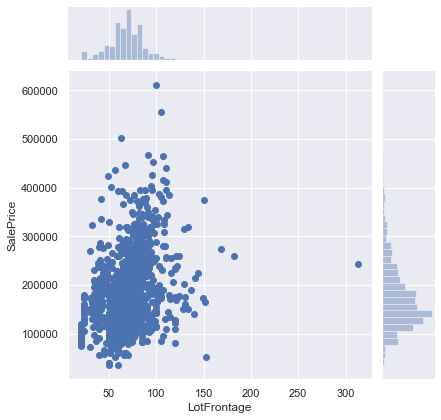

In [39]:
# Lot frontage vs SalePrice 
sns.jointplot(x = house_pricing['LotFrontage'], y = house_pricing['SalePrice'])
plt.show()

In [40]:
# Removing some outliers on lower right side of 'GrLivArea'
print('saphe of the dataset before removing outliers',house_pricing.shape)
#house_pricing = handle_outliers(house_pricing,'LotFrontage')
print('saphe of the dataset after removing outliers',house_pricing.shape)

saphe of the dataset before removing outliers (1429, 64)
saphe of the dataset after removing outliers (1429, 64)


#### 3. Sales Price vs LotArea
<font color="red">Observations</font> Most of the LotArea seems to be < 50000 with some outliers

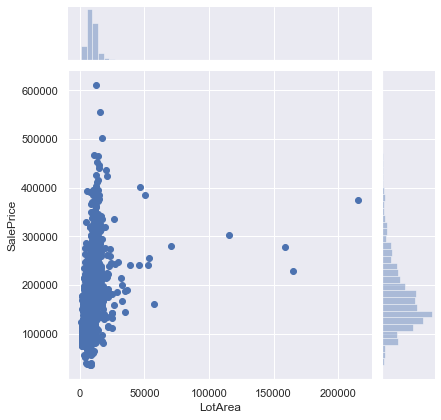

In [41]:
# LotArea vs SalePrice
sns.jointplot(x = house_pricing['LotArea'], y = house_pricing['SalePrice'])
plt.show()

In [42]:
# Removing some outliers on lower right side of 'GrLivArea'
print('saphe of the dataset before removing outliers',house_pricing.shape)
#house_pricing = handle_outliers(house_pricing,'LotArea')
print('saphe of the dataset after removing outliers',house_pricing.shape)

saphe of the dataset before removing outliers (1429, 64)
saphe of the dataset after removing outliers (1429, 64)


#### Sales Price vs 1stFlrSF
<font color="red">Observations</font> SalePrice seems to be fairly distributed across 1stFlrSF

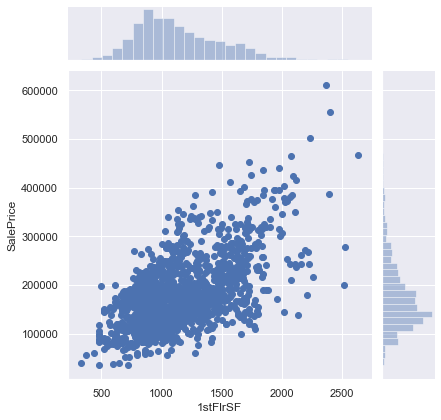

In [43]:
# 1stFlrSF vs SalePrice
sns.jointplot(x = house_pricing['1stFlrSF'], y = house_pricing['SalePrice'])
plt.show()

#### Sales Price vs 2ndFlrSF
<font color="red">Observations</font> SalesPrice seems to be fairly distributed across 2ndFlrSF

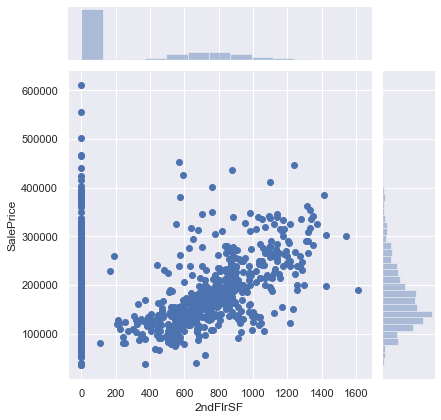

In [44]:
# 2ndFlrSF vs SalePrice
sns.jointplot(x = house_pricing['2ndFlrSF'], y = house_pricing['SalePrice'])
plt.show()

#### Sales Price vs 2ndFlrSF
<font color="red">Observations</font> SalesPrice seems to be fairly distributed across OverallQual

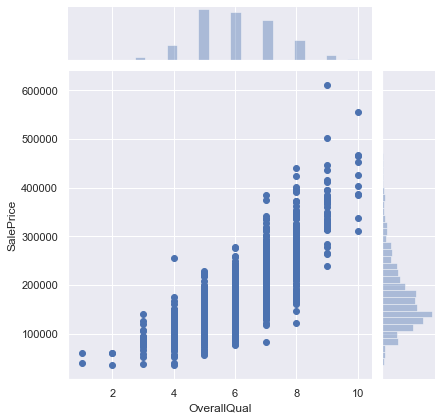

In [45]:
# OverallQual vs SalePrice
sns.jointplot(x = house_pricing['OverallQual'], y = house_pricing['SalePrice'])
plt.show()

#### Sales Price vs OverallCond
<font color="red">Observations</font> SalesPrice seems to be fairly distributed across OverallCond

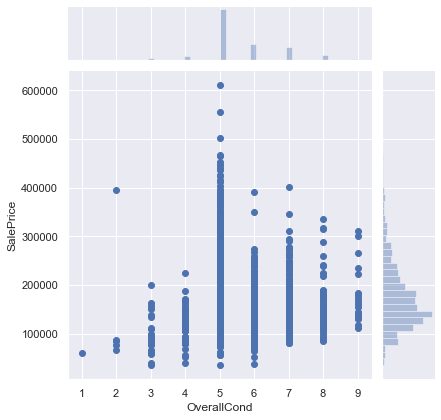

In [46]:
# OverallCond vs SalePrice
sns.jointplot(x = house_pricing['OverallCond'], y = house_pricing['SalePrice'])
plt.show()

### Derive a new column property age and drop the old variables
<font color="red">Observations:</font> As the property age increases, Sales price decreases adn remains constant within in a range

In [47]:
# PropAge -  Property Age from yearsold - yearbuilt
house_pricing['PropertyAge'] = (house_pricing['YrSold'] - house_pricing['YearBuilt'])
house_pricing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PropertyAge
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,856,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,0,none,Attchd,RFn,548,TA,Y,0,61,0,0,0,0,2,2008,WD,Normal,208500,5
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,1262,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,1,TA,Attchd,RFn,460,TA,Y,298,0,0,0,0,0,5,2007,WD,Normal,181500,31
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,920,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,1,TA,Attchd,RFn,608,TA,Y,0,42,0,0,0,0,9,2008,WD,Normal,223500,7
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,756,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,1,Gd,Detchd,Unf,642,TA,Y,0,35,272,0,0,0,2,2006,WD,Abnorml,140000,91
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,1145,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,1,TA,Attchd,RFn,836,TA,Y,192,84,0,0,0,0,12,2008,WD,Normal,250000,8


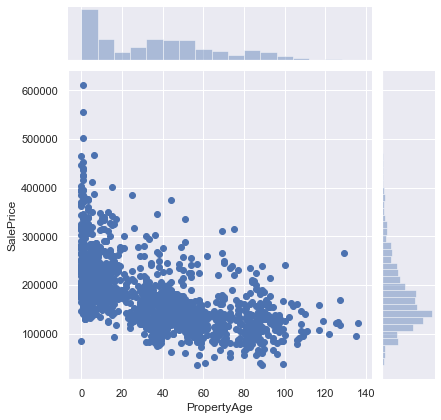

In [48]:
# PropAge vs SalePrice
sns.jointplot(x = house_pricing['PropertyAge'], y = house_pricing['SalePrice'])
plt.show()

In [49]:
house_pricing = house_pricing.drop(columns=['MoSold', 'YrSold', 'YearBuilt', 'YearRemodAdd'], axis = 1)
print(house_pricing.columns)

# check the shape of final data set
print(house_pricing.shape)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
       'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageArea',
       'GarageQual', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'SaleType',
       'SaleCondition', 'SalePrice', 'PropertyAge'],
      dtype='object')
(1429, 61)


## 1.4 Data preparation 

#### Create Dummy variables to convert to numerical for data analysis

In [50]:
house_pricing = pd.get_dummies(house_pricing, drop_first=True )
house_pricing.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice,PropertyAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,...,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_none,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,856,854,0,1710,1,0,2,1,3,1,0,548,0,61,0,0,0,0,208500,5,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,0,0,1262,0,1,2,0,3,1,1,460,298,0,0,0,0,0,181500,31,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,920,920,866,0,1786,1,0,2,1,3,1,1,608,0,42,0,0,0,0,223500,7,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,756,961,756,0,1717,1,0,1,0,3,1,1,642,0,35,272,0,0,0,140000,91,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,1053,0,2198,1,0,2,1,4,1,1,836,192,84,0,0,0,0,250000,8,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


#### Create predictor and target variables for model building

In [51]:
X = house_pricing.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PropertyAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_none,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,856,854,0,1710,1,0,2,1,3,1,0,548,0,61,0,0,0,0,5,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,0,0,1262,0,1,2,0,3,1,1,460,298,0,0,0,0,0,31,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,920,920,866,0,1786,1,0,2,1,3,1,1,608,0,42,0,0,0,0,7,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,756,961,756,0,1717,1,0,1,0,3,1,1,642,0,35,272,0,0,0,91,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,1053,0,2198,1,0,2,1,4,1,1,836,192,84,0,0,0,0,8,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [52]:
# Putting response variable to y
y = house_pricing['SalePrice']
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state = 42)

### Feature scaling: scale the varibles for analysis

In [54]:
X_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=207)

In [55]:
columns_to_transform = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropertyAge']
scaler = StandardScaler()
X_train[columns_to_transform] = scaler.fit_transform(X_train[columns_to_transform]) 
X_test[columns_to_transform] = scaler.fit_transform(X_test[columns_to_transform]) 

## 1.5 Model building & Evaluation
- At first we use linear regression to predict the prices and observe the linear regression assumption
- Use RFE to check the important and non-important features, its not used in predictions anywhere

### 1.5.1 Model building & Evaluation (Linear Regression)

- Before starting Lasso and ridge regression, check for r2_score and other matrix to see if data is not overfitted and other assumptions of linear regression holds true

In [56]:
# Importing the libraries, use RFE for feature elimiation 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

In [57]:
# perform RFE to understand the relationship between variables and find out the important variables 
lm = LinearRegression()
lm.fit(X_train, y_train) 
rfe = RFE(lm, 100)            
rfe = rfe.fit(X_train, y_train)

In [58]:
# Check the ranks, as RFE print the ranks 1 being highest and higher means in-significant
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 67),
 ('LotFrontage', False, 90),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', False, 12),
 ('MasVnrArea', False, 53),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 52),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 106),
 ('BsmtHalfBath', False, 99),
 ('FullBath', False, 96),
 ('HalfBath', False, 73),
 ('BedroomAbvGr', False, 35),
 ('KitchenAbvGr', False, 42),
 ('Fireplaces', False, 31),
 ('GarageArea', False, 27),
 ('WoodDeckSF', False, 78),
 ('OpenPorchSF', False, 98),
 ('EnclosedPorch', False, 95),
 ('3SsnPorch', False, 89),
 ('ScreenPorch', False, 86),
 ('PoolArea', False, 59),
 ('PropertyAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 65),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 70),
 ('LandContour_HLS', True, 1),
 

In [59]:
# select the columns which is of importance
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'PropertyAge', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3',
       'LandContour_HLS', 'LotConfig_CulDSac', 'LandSlope_Sev',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NWAmes', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosA',
       'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn',
       'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'HouseStyle_1Story', 'HouseStyle

In [60]:
# columns which is of no importance
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'OverallCond', 'MasVnrArea', 'BsmtFinSF2',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       ...
       'GarageFinish_Unf', 'GarageQual_Fa', 'GarageQual_Po', 'GarageQual_TA',
       'PavedDrive_Y', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Partial'],
      dtype='object', length=107)

In [61]:
## filter the dataset with required columns
X_train_rfe = pd.DataFrame(X_train[col])
X_train_rfe.head()

,LotArea,OverallQual,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,PropertyAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR3,LandContour_HLS,LotConfig_CulDSac,LandSlope_Sev,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_Stone,Exterior1st_Wd Sdng,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_Other,Exterior2nd_Stone,Exterior2nd_Wd Shng,MasVnrType_none,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_Wood,BsmtQual_none,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_none,BsmtExposure_Gd,BsmtExposure_none,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_none,BsmtFinType2_BLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_none,Electrical_Mix,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_none,GarageFinish_none,GarageQual_Gd,GarageQual_none,PavedDrive_P,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleCondition_AdjLand,SaleCondition_Normal
582,0.149393,-0.048191,0.872595,-0.567652,-0.948442,-0.751686,-0.102573,-1.458530,-0.647538,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1
823,-0.040778,-0.048191,-0.985991,-0.659854,-0.589848,0.565175,-0.102573,0.043046,1.089205,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1254,-0.331668,0.681980,-0.985991,-0.737498,-1.105327,1.413282,-0.102573,0.415651,-1.048325,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
595,0.096584,1.412151,2.252869,1.853876,1.881089,-0.751686,-0.102573,0.794949,-1.181921,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1418,-0.108969,-0.778363,-0.929049,0.228201,-0.029545,-0.751686,-0.102573,-0.726707,0.287631,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


### Calculate r2_score of train & test dataset.
<font color="red">Observations:</font> We can see the difference in r2_score of train and test data set. It indicates model is overfit.

In [62]:
#predict the y_train and calculate r2_score
y_train_pred = lm.predict(X_train)
r2_score(y_true=y_train, y_pred=y_train_pred)

0.9285241048140026

In [63]:
# calculate the r2_score to understand the model
y_test_pred = lm.predict(X_test)
r2_score(y_true=y_test, y_pred=y_test_pred)

-7.127425472436229e+21

In [64]:
y_train_res = y_train - y_train_pred

## Plot the residuals vs predicted values to validate the linear regression assumption
- It can be noticed residuals are mostly concentrated around mean value and not normally distributed. One of the linear regression assumption fails

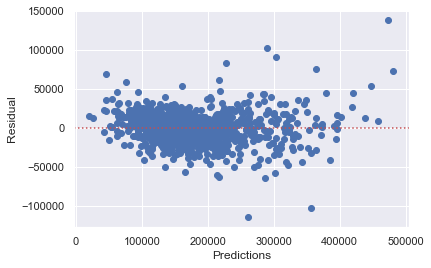

In [65]:
plt.scatter( y_train_pred , y_train_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

### Plot the error terms (residuals to check variation). 

- Though the error terms are normally distributed but residuals does not have constance variance and a pattern can be obtained. This indicates a transformation on response variable is needed before we start regularization

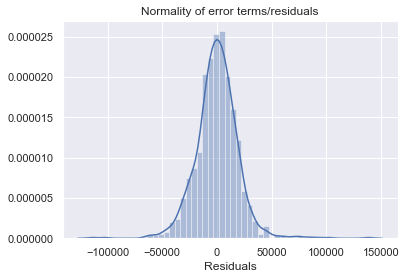

In [66]:
# Distribution of errors
p = sns.distplot(y_train_res, kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

### Observations (Linear regression)
- r2_score between training and test shows model overfits the training data
- Though the error term is normally distributed but residuals against the Y are mostly concentrated and not scattered. In addition as we move from left to right we can notice error terms starts showing distribution

## 1.5.2 Model building & Evaluation (Ridge Regression)
 - Use ridge regression to calculate the r2_score, RMSE & RSS for train and test data 
 - Plot the graph of mean_train_score and mean_test_score.
 
### Linear regression assumption does not holds true and the model is overfitted.

### Error terms are normally distributed but residuals have un-equal variances so we apply transformation on only response variable


In [67]:
y = np.log(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state = 42)

columns_to_transform = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropertyAge']
scaler = StandardScaler()
X_train[columns_to_transform] = scaler.fit_transform(X_train[columns_to_transform]) 
X_test[columns_to_transform] = scaler.fit_transform(X_test[columns_to_transform]) 

### 1.5.2.1 Perform cross validation and get the best values of alpha

In [68]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [69]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 10.0}
-0.082744672411349


### 1.5.2.2 Plot mean score and test score with all the values of alpha
<font color="red">Observations:</font>
- From the plot we can see that best values of alpha comes close to 10
- Best value of r2_score is 93%
- r2_score, RSS & RMSE comes very close to each other

In [70]:
#extract cv_results as dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003866,0.001599,0.001031,0.000170,0.0001,{'alpha': 0.0001},-0.086631,-0.088102,-0.083934,-0.090895,-0.100400,-0.089992,0.005669,26,-0.065332,-0.063703,-0.064633,-0.062651,-0.060756,-0.063415,0.001606
1,0.002841,0.000165,0.000883,0.000020,0.001,{'alpha': 0.001},-0.086612,-0.088061,-0.083923,-0.090881,-0.100380,-0.089972,0.005669,25,-0.065332,-0.063709,-0.064633,-0.062653,-0.060758,-0.063417,0.001606
2,0.002714,0.000056,0.000866,0.000007,0.01,{'alpha': 0.01},-0.086432,-0.087744,-0.083814,-0.090743,-0.100199,-0.089786,0.005665,24,-0.065342,-0.063779,-0.064636,-0.062672,-0.060773,-0.063441,0.001604
3,0.002812,0.000171,0.000881,0.000013,0.05,{'alpha': 0.05},-0.085795,-0.087215,-0.083490,-0.090195,-0.099500,-0.089239,0.005571,23,-0.065407,-0.064041,-0.064685,-0.062761,-0.060850,-0.063549,0.001606
4,0.002743,0.000053,0.000862,0.000017,0.1,{'alpha': 0.1},-0.085225,-0.087018,-0.083109,-0.089694,-0.098771,-0.088763,0.005451,22,-0.065493,-0.064218,-0.064769,-0.062873,-0.060961,-0.063663,0.001600


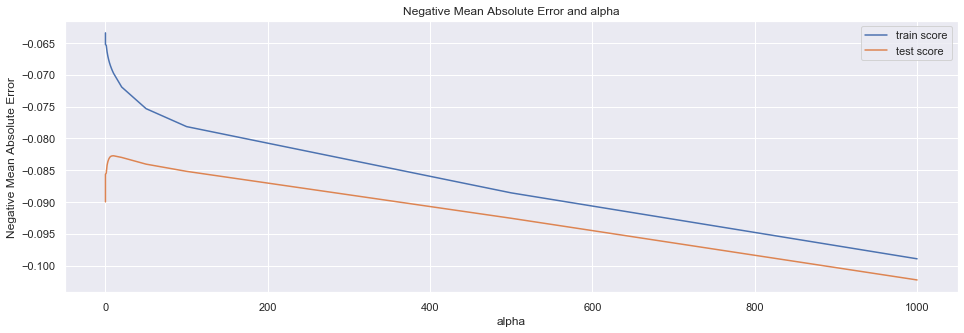

In [71]:
plt.figure(figsize=(16,5))
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plot the RMSE score of tarin vs test
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

### 1.5.2.3 Fit the ridge regression model and calculate the r2_coefficients
- r2_score for train and test data comes very close to each other which is 93%
- RMSE is close to 10 which is good.

In [72]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-1.23576630e-02  8.53024012e-03  1.98309530e-02  7.62649146e-02
  5.40774812e-02  2.95624609e-03  2.97887587e-02  1.19882199e-02
  4.43028466e-02  3.69805636e-02  4.45653230e-02  2.17166692e-03
  7.07954145e-02  9.00170012e-03  2.75857476e-03  9.91984924e-03
  1.61846916e-02  5.64692920e-03 -1.37188673e-02  1.21508036e-02
  1.92935083e-02  1.30856203e-02  9.92975984e-04  9.86438719e-03
  3.07531874e-03  1.14456056e-02  1.09290240e-02 -5.50584729e-02
  5.87138537e-02  4.05088566e-02  5.39583219e-02  2.77423809e-03
  2.08499469e-02 -7.82125969e-03  2.70764597e-04  1.75665021e-02
 -2.40579055e-04 -4.55511297e-03  3.23992782e-02 -1.08452754e-02
  6.45416988e-04 -1.31342046e-02 -4.17881480e-03 -3.73928460e-02
 -4.54410427e-03 -1.46188647e-02  1.94586858e-02  3.36050340e-02
 -1.27419211e-02  6.87668376e-02 -3.71844495e-02 -4.25897873e-03
 -4.85780231e-02 -4.69064270e-02 -2.98671449e-02 -1.19963304e-02
  7.75139615e-03 -2.57515153e-02  2.46174625e-03  5.37556124e-02
 -1.22997841e-02 -1.04188

#### Calculate r2_score, residual sum of squares and rmse for training data
 - For ridge regression r2_score, RSS & RMSE are very close to each other

In [73]:
y_pred_train = ridge.predict(X_train)

#calculate r2_score
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_score',r2_train_lr)

#Calculate residual sum of square(RSS)
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS', rss1_lr)

#Calculate mean_squared_error(RMSE)
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('RMSE', mse_train_lr**0.5) 

r2_score 0.935016519411649
RSS 10.073885602272332
RMSE 0.10036874813542476


#### Calculate r2_score, residual sum of squares and rmse for test data

In [74]:
y_pred_test = ridge.predict(X_test)

#calculate r2_score
r2_train_lr = r2_score(y_test, y_pred_test)
print('r2_score', r2_train_lr)

#Calculate residual sum of square(RSS)
rss1_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS', rss1_lr)

#Calculate mean_squared_error(RMSE)
mse_train_lr = mean_squared_error(y_test, y_pred_test)
print('RMSE', mse_train_lr**0.5) 

r2_score 0.89676754638341
RSS 5.767828570740966
RMSE 0.11595180827921156


### 1.5.2.4 Check the co-efficients having positive and negative impacts

In [75]:
# lasso model parameters
model_parameters = list(ridge.coef_ )
model_parameters.insert(0, ridge.intercept_)
model_parameters_ridge = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters_ridge))

[('constant', 11.801),
 ('MSSubClass', -0.012),
 ('LotFrontage', 0.009),
 ('LotArea', 0.02),
 ('OverallQual', 0.076),
 ('OverallCond', 0.054),
 ('MasVnrArea', 0.003),
 ('BsmtFinSF1', 0.03),
 ('BsmtFinSF2', 0.012),
 ('TotalBsmtSF', 0.044),
 ('1stFlrSF', 0.037),
 ('2ndFlrSF', 0.045),
 ('LowQualFinSF', 0.002),
 ('GrLivArea', 0.071),
 ('BsmtFullBath', 0.009),
 ('BsmtHalfBath', 0.003),
 ('FullBath', 0.01),
 ('HalfBath', 0.016),
 ('BedroomAbvGr', 0.006),
 ('KitchenAbvGr', -0.014),
 ('Fireplaces', 0.012),
 ('GarageArea', 0.019),
 ('WoodDeckSF', 0.013),
 ('OpenPorchSF', 0.001),
 ('EnclosedPorch', 0.01),
 ('3SsnPorch', 0.003),
 ('ScreenPorch', 0.011),
 ('PoolArea', 0.011),
 ('PropertyAge', -0.055),
 ('MSZoning_FV', 0.059),
 ('MSZoning_RH', 0.041),
 ('MSZoning_RL', 0.054),
 ('MSZoning_RM', 0.003),
 ('LotShape_IR2', 0.021),
 ('LotShape_IR3', -0.008),
 ('LotShape_Reg', 0.0),
 ('LandContour_HLS', 0.018),
 ('LandContour_Low', -0.0),
 ('LandContour_Lvl', -0.005),
 ('LotConfig_CulDSac', 0.032),
 ('Lot

#### 1.5.2.4.2 Check for (+) ve coefficients which has most of the impact.
<font color="red">Observations:</font> Features OverallQual, GrLivArea, Neighborhood_Crawfor, SaleCondition_Normal, MSZoning_FV , OverallCond impacts the sales price most

In [76]:
#Print the coefficients in decreasing order
ridge_parameters = list(zip(cols, model_parameters_ridge))
ridge_df = pd.DataFrame(ridge_parameters)
ridge_df.columns = ['Variable', 'Coeff']
ridge_positive = ridge_df.sort_values(by=['Coeff'], ascending = False)
ridge_positive.head(10)

,Variable,Coeff
0,constant,11.801
4,OverallQual,0.076
13,GrLivArea,0.071
50,Neighborhood_Crawfor,0.069
206,SaleCondition_Normal,0.067
29,MSZoning_FV,0.059
60,Neighborhood_NridgHt,0.054
200,SaleType_New,0.054
5,OverallCond,0.054
31,MSZoning_RL,0.054


#### 1.5.2.4.2 Check for coefficients which has high negative co-efficients.
<font color="red">Observations:</font> Features PropertyAge, HeatingQC_Fa, Neighborhood_MeadowV, BldgType_Twnhs impacts the sale price most

In [77]:
#Print the coefficients in increasing order
ridge_negative = ridge_df.sort_values(by=['Coeff'], ascending = True)
ridge_negative.head(10)

,Variable,Coeff
28,PropertyAge,-0.055
162,HeatingQC_Fa,-0.049
53,Neighborhood_IDOTRR,-0.049
54,Neighborhood_MeadowV,-0.047
79,BldgType_Twnhs,-0.046
156,BsmtFinType2_BLQ,-0.043
94,Exterior1st_BrkComm,-0.041
51,Neighborhood_Edwards,-0.037
44,LandSlope_Sev,-0.037
165,HeatingQC_TA,-0.034


### 1.5.3 Model building & Evaluation (Lasso Regression)
 - Use Lasso regression to calculate the r2_score, RMSE & RSS for train and test data 
 - Plot the graph of mean_train_score and mean_test_score.

### 1.5.3.1 Perform cross validation and get the best values of alpha

In [78]:
lasso = Lasso()
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [79]:
# Printing the best hyperparameter alpha and best score
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.001}
-0.08422819488330026


### 1.5.3.2 Plot mean score and test score with all the values of alpha
<font color="red">Observations:</font>
- From the plot we can see that best values of alpha comes close to 10
- Best value of r2_score is 93%
- r2_score, RSS & RMSE comes very close to each other

In [80]:
#extract cv_results as dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha'] <= 1]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.059324,0.002475,0.001051,0.000119,0.0001,{'alpha': 0.0001},-0.082128,-0.084634,-0.081157,-0.085459,-0.090785,-0.084833,0.003367,2,-0.067167,-0.065960,-0.066566,-0.064729,-0.063234,-0.065531,0.001404
1,0.010982,0.001760,0.000896,0.000057,0.001,{'alpha': 0.001},-0.085012,-0.080584,-0.084911,-0.087140,-0.083495,-0.084228,0.002162,1,-0.075763,-0.075342,-0.075935,-0.074415,-0.075715,-0.075434,0.000545
2,0.003752,0.000057,0.000829,0.000015,0.01,{'alpha': 0.01},-0.090244,-0.087754,-0.095488,-0.100530,-0.094638,-0.093731,0.004428,3,-0.091402,-0.091347,-0.090282,-0.089936,-0.089715,-0.090536,0.000708
3,0.003149,0.000125,0.000837,0.000025,0.05,{'alpha': 0.05},-0.107707,-0.113720,-0.118392,-0.133993,-0.126879,-0.120138,0.009340,4,-0.120384,-0.117905,-0.118787,-0.116334,-0.116803,-0.118042,0.001450
4,0.002986,0.000110,0.000855,0.000025,0.1,{'alpha': 0.1},-0.140827,-0.143676,-0.152338,-0.170228,-0.162305,-0.153875,0.011092,5,-0.153805,-0.152774,-0.152740,-0.150461,-0.151781,-0.152312,0.001126


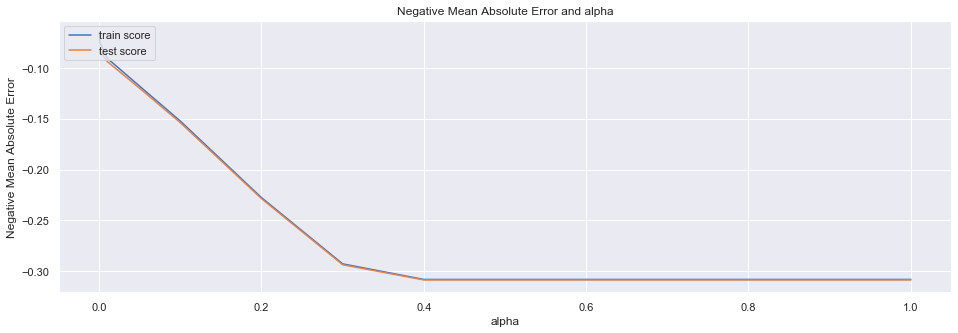

In [81]:
# plotting mean test and train scoes with alpha 
plt.figure(figsize=(16,5))
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### Benefits of Lasso regression.
<font color="red">We can see the benefits of lasso regression</font>
- Some of the coefficients are zero
- r2_score of both training and test dataset are close to each other.

In [82]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 0.001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
print(lasso.coef_)

[-0.01145677  0.00944746  0.01891923  0.0903147   0.05913272  0.00224218
  0.03260479  0.00228547  0.04417475  0.00362721  0.         -0.00222035
  0.12078288  0.0111721   0.00056092  0.00644557  0.01041215  0.
 -0.00801899  0.01250804  0.02595518  0.01173898  0.          0.0082651
  0.00148622  0.01125718  0.00951566 -0.06602932  0.05479021  0.
  0.05688909 -0.          0.         -0.         -0.0059244   0.
  0.         -0.          0.01378181  0.          0.         -0.01000187
 -0.         -0.         -0.         -0.          0.01293553  0.01788233
 -0.          0.07144442 -0.01957277  0.         -0.02356549 -0.
 -0.         -0.          0.         -0.          0.          0.04451018
 -0.          0.         -0.         -0.          0.03488752  0.01218853
 -0.          0.          0.          0.02442077  0.          0.
 -0.          0.         -0.          0.          0.          0.
 -0.03141715  0.          0.          0.         -0.          0.
 -0.         -0.          0.       

#### Calculate r2_score, residual sum of squares and rmse for training data
- For lasso regression r2_score, RSS & RMSE are very close to each other

In [83]:
y_pred_train = lasso.predict(X_train)

#calculate r2_score
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_score', r2_train_lr)

#Calculate residual sum of square(RSS)
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS',rss1_lr)

#Calculate mean_squared_error(RMSE)
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('RMSE', mse_train_lr**0.5) 

r2_score 0.924299772818301
RSS 11.735219809558266
RMSE 0.10832921955575174


#### Calculate r2_score, residual sum of squares and rmse for test data

In [84]:
y_pred_test = lasso.predict(X_test)

#calculate r2_score
r2_train_lr = r2_score(y_test, y_pred_test)
print('r2_score',r2_train_lr)

#Calculate residual sum of square(RSS)
rss1_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS', rss1_lr)

#Calculate mean_squared_error(RMSE)
mse_train_lr = mean_squared_error(y_test, y_pred_test)
print('RMSE', mse_train_lr**0.5) 

r2_score 0.9015572087917821
RSS 5.500219396344934
RMSE 0.11322996173232716


### Observations:
- 

### 1.5.3.3 Check the co-efficients having positive and negative impacts

In [85]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters_lasso = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters_lasso))

[('constant', 11.825),
 ('MSSubClass', -0.011),
 ('LotFrontage', 0.009),
 ('LotArea', 0.019),
 ('OverallQual', 0.09),
 ('OverallCond', 0.059),
 ('MasVnrArea', 0.002),
 ('BsmtFinSF1', 0.033),
 ('BsmtFinSF2', 0.002),
 ('TotalBsmtSF', 0.044),
 ('1stFlrSF', 0.004),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.002),
 ('GrLivArea', 0.121),
 ('BsmtFullBath', 0.011),
 ('BsmtHalfBath', 0.001),
 ('FullBath', 0.006),
 ('HalfBath', 0.01),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.008),
 ('Fireplaces', 0.013),
 ('GarageArea', 0.026),
 ('WoodDeckSF', 0.012),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.008),
 ('3SsnPorch', 0.001),
 ('ScreenPorch', 0.011),
 ('PoolArea', 0.01),
 ('PropertyAge', -0.066),
 ('MSZoning_FV', 0.055),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.057),
 ('MSZoning_RM', -0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.006),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', -0.0),
 ('LotConfig_CulDSac', 0.014),
 ('LotConfig_FR2', 

### 1.5.3.4.1 Check for (+) ve coefficients which has most of the impact.
<font color="red">Observations:</font> Features GrLivArea, SaleType_New, OverallQual, Neighborhood_Crawfor and OverallCond impacts the sales price most

In [86]:
lasso_parameters = list(zip(cols, model_parameters_lasso))
lasso_df = pd.DataFrame(lasso_parameters)
lasso_df.columns = ['Variable', 'Coeff']
lasso_positive = lasso_df.sort_values(by=['Coeff'], ascending = False)
lasso_positive.head(10)

,Variable,Coeff
0,constant,11.825
13,GrLivArea,0.121
200,SaleType_New,0.094
4,OverallQual,0.090
50,Neighborhood_Crawfor,0.071
5,OverallCond,0.059
31,MSZoning_RL,0.057
29,MSZoning_FV,0.055
206,SaleCondition_Normal,0.049
134,Foundation_PConc,0.048


### 1.5.3.4.2 Check for (-) ve coefficients which has most of the impact.
<font color="red">Observations:</font> Features PropertyAge, BldgType_Twnhs, HeatingQC_Fa, HeatingQC_TA and GarageType_none impacts the sales price most

In [87]:
lasso_negative = lasso_df.sort_values(by=['Coeff'], ascending = True)
lasso_negative.head(10)

,Variable,Coeff
28,PropertyAge,-0.066
79,BldgType_Twnhs,-0.031
162,HeatingQC_Fa,-0.028
165,HeatingQC_TA,-0.028
184,GarageType_none,-0.028
53,Neighborhood_IDOTRR,-0.024
51,Neighborhood_Edwards,-0.020
156,BsmtFinType2_BLQ,-0.017
148,BsmtExposure_No,-0.013
1,MSSubClass,-0.011


## Inference Ridge vs Lasso regression:

<font color="red">Observations: </font>
  - For both the models r2_score parameter is very close and RMSE and RSS is very less.
  - Ridge regression tends to perform better as r2_socre parameter is best for ridge regression

### Lasso regression tends to perform better as r2_score for both training and test data set is approximately same and it helps with feature selection.

#### Ridge regression:  alpha value: 10
 
#### Lasso regression: alpha value: .001

### Take the top 15 features afftecting the housing price prediction

In [88]:
lasso_positive.reset_index(inplace=True, drop=True)
lasso_positive = lasso_positive.head(16)
lasso_positive.set_index(pd.Index(['C','x1', 'x2', 'x3', 'x4', 'x5' , 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15']), inplace = True) 
lasso_positive

,Variable,Coeff
C,constant,11.825
x1,GrLivArea,0.121
x2,SaleType_New,0.094
x3,OverallQual,0.090
x4,Neighborhood_Crawfor,0.071
x5,OverallCond,0.059
x6,MSZoning_RL,0.057
x7,MSZoning_FV,0.055
x8,SaleCondition_Normal,0.049
x9,Foundation_PConc,0.048


### Lasso regression (equations):

Log(Y) = constant + 0.121(x1) + 0.094(x2) + 0.090(x3) + 0.071(x4) + 0.059(x5) + 0.057(x6) + 0.055(x7) + 0.049(x8) + 0.048(x9) + 0.045(x10) + 0.044(x11) + 0.041(x12) + 0.036(x13) + 0.035(x14) + 0.033(x15) + lambda * (sum of absolute value of coefficients)


### Features affecting the sales price (+) ve most are listed below
- GrLivArea   : Above grade (ground) living area square feet  
- SaleType_New: Sales type of the house
- OverallQual : Rates the overall material and finish of the house
- Neighborhood_Crawfor : Physical locations within Ames city limits
- OverallCond : Rates the overall condition of the house
        
### Features affecting the sales price (-) ve most are listed below
- PropertyAge  : Age of the property at the time of seeling
- BldgType_Twnhs : Building Type
    

#### When the market value of the property is lower than the Predicted Sale Price, its the time to buy.